In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
%matplotlib inline
sns.set_style()

In [2]:
df = pd.read_csv("../b/sensores_Temp-Hum.csv")

In [4]:
df.tail()

,created_at,entry_id,field1,field2,latitude,longitude,elevation,status
15283,2019-10-14 09:40:59 CEST,15284,28.7,38.0,NaN,NaN,NaN,NaN
15284,2019-10-14 09:42:01 CEST,15285,28.7,38.0,NaN,NaN,NaN,NaN
15285,2019-10-14 09:43:01 CEST,15286,28.7,38.0,NaN,NaN,NaN,NaN
15286,2019-10-14 09:44:04 CEST,15287,28.7,38.0,NaN,NaN,NaN,NaN
15287,2019-10-14 09:45:04 CEST,15288,28.7,38.0,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['created_at', 'entry_id', 'field1', 'field2', 'latitude', 'longitude',
       'elevation', 'status'],
      dtype='object')

In [9]:
df = df[['created_at', 'entry_id', 'field1', 'field2']]

In [13]:
## Nos quita las columnas cuyos valores son todos NaN
# df.dropna(axis=1,how='all',inplace=True)
df.describe()

,entry_id,field1,field2
count,15288.000000,15210.000000,15210.000000
mean,7644.500000,26.700723,39.979684
std,4413.409793,2.430800,4.542909
min,1.000000,21.900000,33.600000
25%,3822.750000,23.800000,36.700000
50%,7644.500000,27.900000,38.300000
75%,11466.250000,28.700000,44.000000
max,15288.000000,30.100000,56.300000


In [18]:
df.rename(columns={'field1':'temp','field2':'RH'}, inplace=True)

C:\Users\aulafor\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,created_at,entry_id,temp,hr
0,2019-10-02 18:14:54 CEST,1,NaN,NaN
1,2019-10-02 18:15:54 CEST,2,NaN,NaN
2,2019-10-02 18:16:54 CEST,3,NaN,NaN
3,2019-10-02 18:17:54 CEST,4,NaN,NaN
4,2019-10-02 18:18:54 CEST,5,NaN,NaN
...,...,...,...,...
15283,2019-10-14 09:40:59 CEST,15284,28.7,38.0
15284,2019-10-14 09:42:01 CEST,15285,28.7,38.0
15285,2019-10-14 09:43:01 CEST,15286,28.7,38.0
15286,2019-10-14 09:44:04 CEST,15287,28.7,38.0


In [25]:
df.created_at = pd.to_datetime(df.created_at)

C:\Users\aulafor\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\aulafor\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


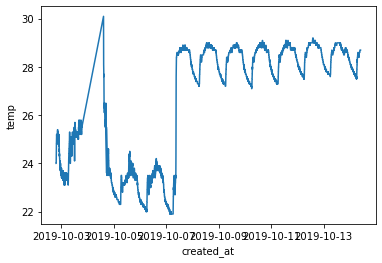

In [26]:
sns.lineplot(x="created_at",y="temp",data=df)

In [49]:
sns.scatterplot(x="created_at",y="RH",data=df)

AttributeError: module 'seaborn' has no attribute 'scatterplot2D'

In [29]:
df[df.temp == df.temp.max()]

,created_at,entry_id,temp,RH
1453,2019-10-04 14:30:58,1454,30.1,41.0


In [31]:
print(df.created_at.min(),df.created_at.max())

2019-10-02 18:14:54 2019-10-14 09:45:04


In [43]:
df[1400:1473]

,created_at,entry_id,temp,RH,timegaps
1400,2019-10-03 18:38:46,1401,25.7,42.9,00:01:00
1401,2019-10-03 18:39:48,1402,25.6,43.0,00:01:02
1402,2019-10-03 18:40:48,1403,25.5,43.2,00:01:00
1403,2019-10-04 13:38:31,1404,NaN,NaN,18:57:43
1404,2019-10-04 13:39:32,1405,NaN,NaN,00:01:01
...,...,...,...,...,...
1468,2019-10-04 14:46:08,1469,27.8,39.2,00:01:02
1469,2019-10-04 14:47:08,1470,27.7,39.4,00:01:00
1470,2019-10-04 14:48:08,1471,27.6,39.6,00:01:00
1471,2019-10-04 14:49:08,1472,27.6,39.6,00:01:00


In [35]:
df.created_at.diff().value_counts()

00:01:02    6621
00:01:00    6612
00:01:03     926
00:01:01     422
00:00:59     291
00:00:58     123
00:01:04      94
00:01:05      44
00:01:06      30
00:00:56      24
00:00:57      19
00:01:07      11
00:00:55       5
00:02:03       4
00:01:08       4
00:00:54       4
00:00:53       3
00:01:11       3
00:00:46       3
00:01:23       2
00:01:17       2
00:00:38       2
00:00:39       2
00:01:09       2
00:00:52       2
00:01:24       2
00:02:04       2
00:01:10       2
00:00:44       2
00:01:25       1
00:01:16       1
00:00:40       1
00:02:01       1
00:02:02       1
00:01:42       1
00:01:57       1
00:02:00       1
00:00:47       1
00:01:15       1
18:57:43       1
00:15:08       1
00:01:26       1
00:00:35       1
00:00:50       1
00:27:50       1
00:01:14       1
00:07:38       1
00:03:04       1
00:01:40       1
00:05:05       1
00:03:05       1
00:02:38       1
00:01:19       1
Name: created_at, dtype: int64

In [44]:
df.loc[1:,"timegaps"]=df[1:].timegaps.astype(np.int64)/1e9

In [52]:
df.loc[0,"timegaps"] = np.nan

In [55]:
df['timegaps'] = df['timegaps'].astype('float64')

In [56]:
df.timegaps

0         NaN
1        60.0
2        60.0
3        60.0
4        60.0
         ... 
15283    62.0
15284    62.0
15285    60.0
15286    63.0
15287    60.0
Name: timegaps, Length: 15288, dtype: float64

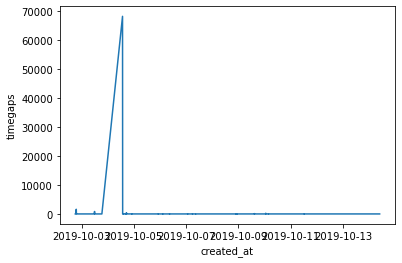

In [57]:
sns.lineplot(x="created_at",y="timegaps",data=df)

In [59]:
df[df.timegaps==df.timegaps.max()]

,created_at,entry_id,temp,RH,timegaps
1403,2019-10-04 13:38:31,1404,NaN,NaN,68263.0


In [67]:
df[1402:1463]

,created_at,entry_id,temp,RH,timegaps
1402,2019-10-03 18:40:48,1403,25.5,43.2,60.0
1403,2019-10-04 13:38:31,1404,NaN,NaN,68263.0
1404,2019-10-04 13:39:32,1405,NaN,NaN,61.0
1405,2019-10-04 13:40:32,1406,NaN,NaN,60.0
1406,2019-10-04 13:41:32,1407,NaN,NaN,60.0
...,...,...,...,...,...
1458,2019-10-04 14:36:00,1459,28.3,38.5,62.0
1459,2019-10-04 14:37:02,1460,28.2,38.8,62.0
1460,2019-10-04 14:38:02,1461,28.1,38.8,60.0
1461,2019-10-04 14:39:02,1462,28.0,38.8,60.0


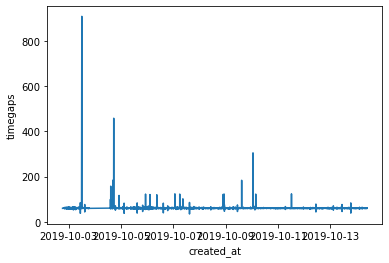

In [64]:
sns.lineplot(x="created_at",y="timegaps",data=df[df.timegaps<=1000])

In [68]:
from datetime import datetime

In [72]:
df = df[df.c > datetime(year=2019,month=10,day=9)]

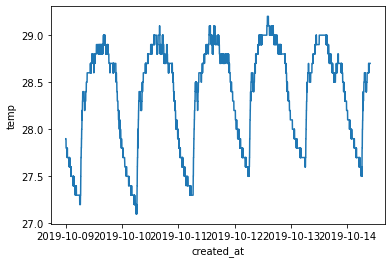

In [89]:
sns.lineplot(x=df.index,y="temp",data=df)

In [96]:
df_roll10 = df.rolling(window=24*60,win_type="gaussian").mean(std=60)

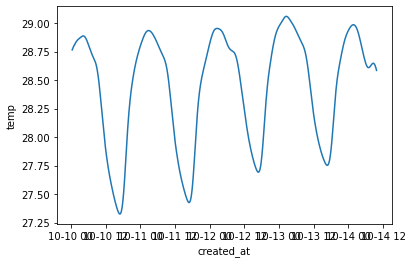

In [97]:
sns.lineplot(x=df_roll10.index,y=df_roll10.temp)

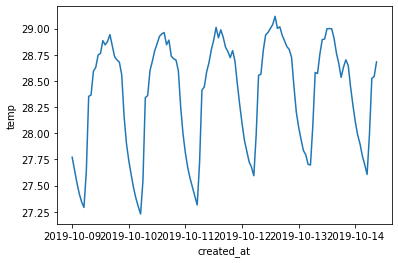

In [109]:
df_res_hora = df.resample(rule='H').mean()
sns.lineplot(x=df_res_hora.index,y=df_res_hora.temp)

In [107]:
df.resample(rule="D").max()

,entry_id,temp,RH,timegaps
created_at,,,,
2019-10-09,9078,29.0,39.7,184.0
2019-10-10,10486,29.1,37.0,305.0
2019-10-11,11895,29.1,37.2,124.0
2019-10-12,13305,29.2,38.1,79.0
2019-10-13,14714,29.0,39.8,84.0
2019-10-14,15288,28.7,40.3,65.0
